# Visualização de Distribuições Longitudinais

Este notebook foi desenvolvido para visualizar distribuições longitudinais obtidas pelo CORSIKA, tanto para $NSHOW = 1$ quanto para $NSHOW = n$, com $n$ sendo o número de eventos. O formato de dados principal é `.lst`, mas o notebook pode ser adaptado para processar arquivos `.long` diretamente.

Para habilitar a saída de dados `.lst`, é necessário selecionar a opção `7 - SLANT depth instead of vertical depth for longi-distribution` durante a compilação do CORSIKA.

Reconheço que este notebook não está otimizado, e códigos mais simples poderiam ser implementados para realizar as mesmas funções. Sugestões são sempre bem-vindas e estou à disposição para recebê-las.

Marcos V. T. Olegario   
marcos.olegario@usp.br

25/out/2024

In [1]:
import numpy as np
import matplotlib.pyplot as plt

file_path = 'run5/DAT000005.lst'

In [2]:
def process_line(line):
    # Remove caracteres de nova linha e espaços extras
    line = line.strip()
    
    # Substitui o "+-" por um espaço para dividir facilmente valores e erros
    line = line.replace("+-", " ")
    
    # Faz o split por qualquer quantidade de espaços em branco
    parts = line.split()

    # Converte os valores numéricos em floats
    values = [float(part) for part in parts]

    return values

In [3]:
def extract_data(file_path, header, last_line):
    with open(file_path, 'r') as file:
        # Lê as linhas do arquivo dentro do intervalo especificado
        lines = file.readlines()[header - 1:last_line]
    
    # Extrai os nomes das colunas
    columns_names = lines[0].split()
    
    # Processa as linhas, ignorando o cabeçalho
    data = [process_line(line) for line in (lines[2:] if lines[1] == '\n' else lines[1:])]

    return columns_names, np.array(data)

## Para um único chuveiro

In [4]:
# Definindo os intervalos
header, last_line = 1241, 1427

# Extraindo dados dos dois intervalos
column_names, data = extract_data(file_path, header, last_line)

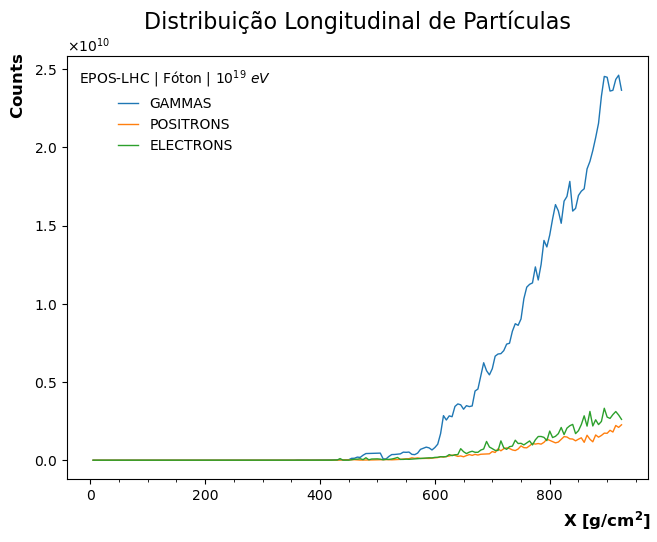

In [6]:
max = -1 # índice da última linha que quero graficar
cut = -6 # índice da última coluna que quero graficar ('None' para todas)

# Plotando cada coluna em função da profundidade 
fig, ax = plt.subplots(figsize=(7.5, 5.5))

for i, column_name in enumerate(column_names[1:cut], start=1):
    ax.plot(data[:max, 0], data[:max, i], lw=1, label=column_name)


ax.set_xlabel(r"$\mathbf{X \ [g/cm^2]}$", fontsize=12)
ax.set_ylabel(r"$\mathbf{Counts}$", fontweight='bold', fontsize=12)
ax.set_title("Distribuição Longitudinal de Partículas", pad=20, fontsize=16)

ax.xaxis.set_label_coords(0.93, -0.07)
ax.yaxis.set_label_coords(-0.07, 0.93)

ax.ticklabel_format(axis='y', style='sci',scilimits=(10,13))
ax.yaxis.major.formatter._useMathText = True

ax.minorticks_on()
ax.yaxis.set_tick_params(which='minor', bottom=False)

#plt.xlim(0,2500)
#plt.yscale('log')
plt.legend(title=r"EPOS-LHC | Fóton | $10^{19} \ eV$", handlelength=1.5,frameon=False, facecolor='white')
plt.show()

## Para vários eventos

**Legenda: colunas esperadas**

|  0   |   1    |    2      |     3     |      4       |     5     |      6       |  7  |   8    |  9  |   10   |   11    |     12     |   13    |     14     |   15   |    16     |     17     |      18      |
|------|--------|-----------|-----------|--------------|-----------|--------------|-----|--------|-----|--------|---------|------------|---------|------------|--------|-----------|------------|--------------|
| DEPTH| GAMMAS | errGAMMAS | POSITRONS | errPOSITRONS | ELECTRONS | errELECTRONS | MU+ | errMU+ | MU- | errMU- | HADRONS | errHADRONS | CHARGED | errCHARGED | NUCLEI | errNUCLEI | CHERENKOV  | errCHERENKOV  |
|      |        |           |           |              |           |              |     |        |     |        |         |            |         |            |        |           |            |              |


In [7]:
# Definindo os intervalos
header1, last_line1 = 2236, 2424
header2, last_line2 = 2428, 2616

# Extraindo dados dos dois intervalos
names1, data1 = extract_data(file_path, header1, last_line1)
names2, data2 = extract_data(file_path, header2, last_line2)

# Combinando os dados e erros em arrays distintos
data = np.hstack((data1, data2[:, 1:]))
dataErr = data[:, [0] + list(range(2, data.shape[1], 2))]  # Colunas de índice 0, 2, 4, 6, ...
data = data[:, [0] + list(range(1, data.shape[1], 2))]  # Colunas de índice 0, 1, 3, 5, ...

# Nomes das colunas
column_names = list(dict.fromkeys(names1 + names2))
#column_err_names = 

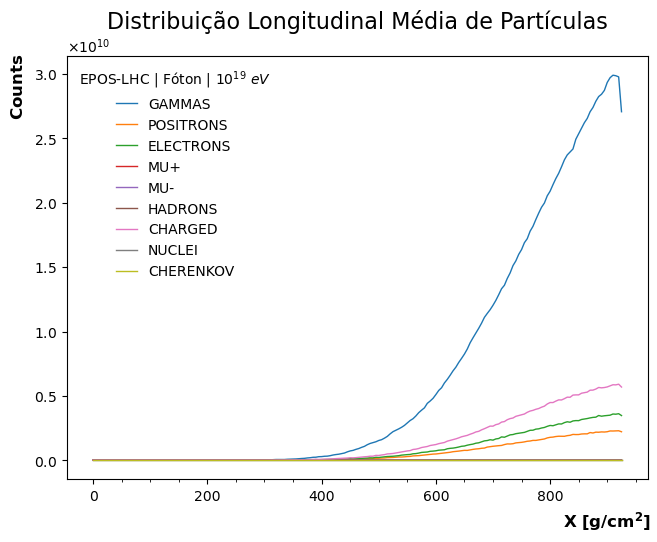

In [8]:
max = -1 # índice da última linha que quero graficar
cut = None # índice da última coluna que quero graficar ('None' para todas)

# Plotando cada coluna em função da profundidade 
fig, ax = plt.subplots(figsize=(7.5, 5.5))

for i, column_name in enumerate(column_names[1:cut], start=1):
    ax.plot(data[:max, 0], data[:max, i], lw=1, label=column_name)


ax.set_xlabel(r"$\mathbf{X \ [g/cm^2]}$", fontsize=12)
ax.set_ylabel(r"$\mathbf{Counts}$", fontweight='bold', fontsize=12)
ax.set_title("Distribuição Longitudinal Média de Partículas", pad=20, fontsize=16)

ax.xaxis.set_label_coords(0.93, -0.07)
ax.yaxis.set_label_coords(-0.07, 0.93)

ax.ticklabel_format(axis='y', style='sci',scilimits=(10,13))
ax.yaxis.major.formatter._useMathText = True

ax.minorticks_on()
ax.yaxis.set_tick_params(which='minor', bottom=False)

#plt.xlim(0,2500)
#plt.yscale('log')
plt.legend(title=r"EPOS-LHC | Fóton | $10^{19} \ eV$", handlelength=1.5,frameon=False, facecolor='white')
plt.show()

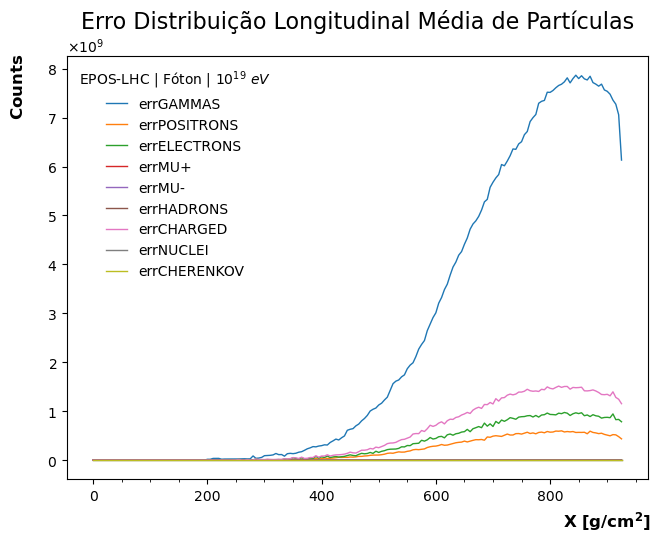

In [9]:
max = -1 # índice da última linha que quero graficar
cut = None # índice da última coluna que quero graficar ('None' para todas)

# Plotando cada coluna em função da profundidade 
fig, ax = plt.subplots(figsize=(7.5, 5.5))

for i, column_name in enumerate(column_names[1:cut], start=1):
    ax.plot(dataErr[:max, 0], dataErr[:max, i], lw=1, label="err"+column_name)


ax.set_xlabel(r"$\mathbf{X \ [g/cm^2]}$", fontsize=12)
ax.set_ylabel(r"$\mathbf{Counts}$", fontweight='bold', fontsize=12)
ax.set_title("Erro Distribuição Longitudinal Média de Partículas", pad=20, fontsize=16)

ax.xaxis.set_label_coords(0.93, -0.07)
ax.yaxis.set_label_coords(-0.07, 0.93)

ax.ticklabel_format(axis='y', style='sci',scilimits=(10,13))
ax.yaxis.major.formatter._useMathText = True

ax.minorticks_on()
ax.yaxis.set_tick_params(which='minor', bottom=False)

#plt.xlim(0,2500)
#plt.yscale('log')
plt.legend(title=r"EPOS-LHC | Fóton | $10^{19} \ eV$", handlelength=1.5,frameon=False, facecolor='white')
plt.show()